<a href="https://colab.research.google.com/github/JeonJongDae/dinner_stock_AI/blob/main/4%EC%A3%BC%EC%B0%A8/Homework_20230420_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from pandas_datareader import data
import yfinance as yfin
import pandas as pd
from datetime import timedelta
import plotly.graph_objects as go
import datetime 
import numpy as np

yfin.pdr_override()

In [ ]:
#주가 가져오기
def get_stocks(ticker, start_date,end_date):
    stock_df = data.get_data_yahoo(ticker, start = start_date, end=end_date)
    stock_df['Close'].plot()
    get_chart(stock_df)
    return stock_df

In [ ]:
#차트 그리기
def get_chart(stock_df):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=stock_df.index,
        y=stock_df['Close'],
        name = '종가',
        # connectgaps=True # override default to connect the gaps
    ))
    fig.add_trace(go.Scatter(
        x=stock_df.index,
        y=stock_df['Volume'],
        name='거래량',
    ))
    # fig.add_trace(go.Scatter(
    #     x=sell_dates,
    #     y=plan_df['Volume'],#TSLA_df.loc[first_date]['Close'],
    #     mode="markers+text",
    #     name="분할매수시점",
    #     # text=plan_df['매수가'],#["Text D", "Text E", "Text F", '3', '3'],
    #     textposition="bottom center"
    # ))
    fig.show()

In [ ]:
def get_price_dataframe(num, percent, start_price, bear_bull, buyqty):
    price_list = [start_price]
    average_price_list = []
    buy_qty =[]
   
    for i in range(num-1):
        buy_qty.append(i+1)    
        if bear_bull=='0':
           price_list.append(price_list[i] * (1 - percent))
        else:
          price_list.append(price_list[i] * (1 + percent))
    print(buyqty)
    df = pd.DataFrame({'매수가': price_list})
    # print("-=====매수가=====")
    print(df.tail())
    if buy_qty==0:
       df['매수량'] = np.arange(1,num+1) #buy_qty #1 #range(len(price_list))
    else:
       print(np.arange(buyqty, ((num+1)*buyqty),step=buyqty))
       df['매수량'] = np.arange(buyqty, ((num+1)*buyqty),step=buyqty) 
    # print("-=====매수량=====")
    # print(df.tail())
    #print(df.head())
    df['보유량'] = df['매수량'].cumsum()
    # print("-=====보유량=====")
    # print(df.tail())
    average_price_list = [df['매수가'][0]]
    #print(len(df))
    for i in range(len(df)-1):        
        average_price = (average_price_list[i] * df['보유량'][i] + df['매수가'][i+1] * df['매수량'][i+1]) / df['보유량'][i+1]
        average_price_list.append(average_price)
    df['매수 후 평균단가'] = average_price_list
    df['원금'] = df['매수 후 평균단가'] * df['보유량'] 
    df['매수 후 평가금액'] = df['매수가'] * df['보유량'] 
    df['수익률'] = df['매수 후 평가금액']/df['원금'] - 1
    return df

In [ ]:
def get_sell_dates(plan_df, stock_df,bear_bull):
    first_date = []
    first_cnt =0
    for value in plan_df['매수가']:
        # print(value)
        first_cnt+=1
        index_list = stock_df.query(f'Close >={value} and Close <={value+1}' ).index       
        if len(index_list) == 0 or (len(first_date) > 0 and index_list[-1] - first_date[-1] >= timedelta(days=5)):
            if bear_bull=='1':
               index_list = stock_df.query(f'Close >={value+1}' ).index
            else:
               index_list = stock_df.query(f'Close <={value+1}' ).index
            first_cnt+=1
        #print(index_list)

        if len(first_date) == 0:
            first_date.append(index_list[0])
        else:
            for i in index_list:
                if i > first_date[-1]:
                    # print('i: {}, first_date:{}'.format(i, first_date[-1]))
                    first_date.append(i)
                    break
        # print(first_date[-1])
        # print('-'*10)
        # print(first_date)
    plan_df['매수일자']=first_date
    return first_date

In [ ]:
def plot_status(stock_df, plan_df, sell_dates):

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=stock_df.index,
        y=stock_df['Close'],
        name = '종가',
        # connectgaps=True # override default to connect the gaps
    ))
    fig.add_trace(go.Scatter(
        x=stock_df.index,
        y=[plan_df['매수 후 평균단가'].iloc[-1]] * len(stock_df.index),
        name='매수 후 평균단가',
    ))
    fig.add_trace(go.Scatter(
        x=sell_dates,
        y=plan_df['매수가'],#TSLA_df.loc[first_date]['Close'],
        mode="markers+text",
        name="분할매수시점",
        # text=plan_df['매수가'],#["Text D", "Text E", "Text F", '3', '3'],
        textposition="bottom center"
    ))
    fig.show()

In [ ]:
class run():# 
      def input_1():#ticker, start_date, end_date):
          ticker = input('시뮬레이션 할 종목의 티커를 입력하세요.(예:TSLA): ')
          ture_loop = True
          while ture_loop:
                start_date = input('가져올 시작일자를 입력하세요.(예:20200101): ')
                #  if start_date.isdigit():
                #     print("ok")
                if len(start_date)==8 and start_date.isdigit():
                    dt = datetime.datetime.strptime(start_date, "%Y%m%d")
                    s_date = dt.strftime("%Y-%m-%d")
                    ture_loop=False 
                else:
                    print("시작일자 형식이 20200101 형식으로 입력하세요")
          ture_loop = True
          while ture_loop:
                end_date = input('가져올 종료일자를 입력하세요.(예:20221231): ')          
                if len(end_date)==8 and end_date.isdigit():
                    dt = datetime.datetime.strptime(end_date, "%Y%m%d")
                    e_date = dt.strftime("%Y-%m-%d")
                    ture_loop=False 
                else:
                    print("종료일자 형식이 2021231 형식으로 입력하세요")
          
          stock_df = get_stocks(ticker,s_date,e_date)
        
          print(stock_df.tail())
          print(f"최고점:" f"{stock_df['High'].astype(float).max()}")
          print(f"최저점:" f"{stock_df['Low'].astype(float).min()}")   

    #  def input_2():
          num = input('몇 번 분할매수를 진행하시겠습니까? (예:20): ')
          bear_bull = input('물타기를 원하시면 0, 불타기를 원하시면 1을 입력하세요')
          if bear_bull =='1':
            percent = input('몇 % 상승시 분할매수를 진행하시겠습니까? (예:1): ')
          else:
            percent = input('몇 % 하락시 분할매수를 진행하시겠습니까? (예:1): ')
          start_price = input('첫 주가 구매 단가을 얼마로 설정하시겠습니까?(예:214): ')
          buyqty = input('거래마다 매수수량 얼마로 설정하시겠습니까?(예:0 이면 1주를 시작으로 1주씩 증가): ')
          #get_price_dataframe(num, percent, start_price, bear_bull)
          plan_df = get_price_dataframe(int(num), int(percent)/100, float(start_price),bear_bull,int(buyqty))
          sell_dates = get_sell_dates(plan_df, stock_df, bear_bull)

          print(sell_dates)
          print('\n\n')
          print('='*90)
          print('{}의 현재 보유량은 {}, 매수 후 평균단가는 ${:.2f}입니다.'\
            .format(ticker, plan_df.iloc[-1]['보유량'], plan_df.iloc[-1]['매수 후 평균단가']))
          result = (stock_df.iloc[-1]['Close'] * plan_df.iloc[-1]['보유량'] / plan_df.iloc[-1]['원금'] -1) * 100
          print('총 투자 원금은 ${:.2f} 입니다. {} 기준 수익률은 {:.2f}%입니다.'\
                .format(plan_df.iloc[-1]['원금'], stock_df.index[-1], result))    
            
          filename = '{}_planner.xlsx'.format(ticker)
          plan_df.to_excel(filename)
          print('='*90)
          print('※{}이 생성되었습니다.좌측의 생성된 파일을 다운로드 받아주세요'.format(filename))
          plot_status(stock_df, plan_df, sell_dates)

시뮬레이션 할 종목의 티커를 입력하세요.(예:TSLA): U
가져올 시작일자를 입력하세요.(예:20200101): 20200101
가져올 종료일자를 입력하세요.(예:20221231): 20230430
[*********************100%***********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-04-14  29.400000  30.070000  28.840000  29.440001  29.440001  5840500
2023-04-17  29.230000  30.040001  28.879999  29.990000  29.990000  5015700
2023-04-18  30.559999  30.580000  29.231001  29.410000  29.410000  4826000
2023-04-19  28.930000  29.719999  28.839001  29.520000  29.520000  4021300
2023-04-20  28.940001  29.459999  28.620001  28.670000  28.670000  4151000
최고점:210.0
최저점:21.219999313354492
몇 번 분할매수를 진행하시겠습니까? (예:20): 10
물타기를 원하시면 0, 불타기를 원하시면 1을 입력하세요0
몇 % 하락시 분할매수를 진행하시겠습니까? (예:1): 5
첫 주가 구매 단가을 얼마로 설정하시겠습니까?(예:214): 100
거래마다 매수수량 얼마로 설정하시겠습니까?(예:0 이면 1주를 시작으로 1주씩 증가): 10
10
         매수가
5  77.378094
6  73.509189
7  69.833730
8  66.342043
9  63.024941
[ 10  20  30  40  50  60  70  80  90 100]
[Timestamp('2020-10-22 00:00:00'), Timestamp('2020-10-30 00:00:00'), Timestamp('2021-03-25 00:00:00'), Timestamp('2021-05-10 00:00:0

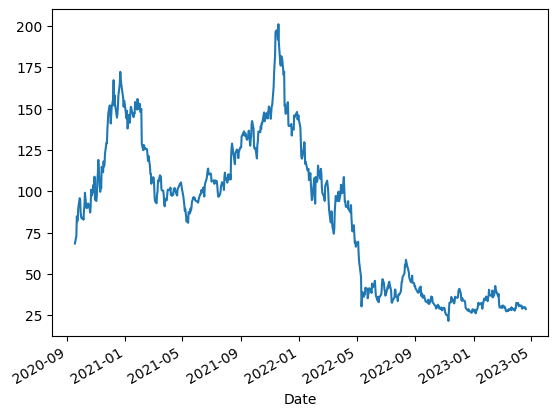

In [ ]:
run.input_1()


#[추세분석]-1
2020년 9월달에 상장하여 1년 후 최고점 210.00달러 찍고 극 하락 후 최저점에서 21.21달러 근처에서 횡보 중( 달러 대신에 $, $$. 사용하고 싶으나 안됨)

In [ ]:
 !pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 13.5 MB/s eta 0:00:00


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime


In [ ]:
title_list = []
url_list = []
article_list = []
date_list = []
ticker='001250'

url = f'https://finance.naver.com/item/main.naver?code=001250'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
#print(soup)
#titles = soup.find_all('div',{'class': 'sub_section news_section'},'li')

titles = soup.find_all('span',{'class':'txt'})
print(titles)
#li_tags = [li for ul in ul_tags for li in ul.findall('li')]
iicnt=0
for t in titles:  
        iicnt +=1
        print(iicnt)
        print(t)
        title = t.text.strip()
        url = t.find('a').get('href')
        date = t.find('em')
        response = requests.get('https://finance.naver.com/' + url) # 상세 기사 페이지
        soup = BeautifulSoup(response.text, 'lxml')
        article = soup.find('div', {'class': 'scr01'})
        
        title_list.append(title)
        url_list.append(url)
        if article is not None:
            article_list.append(article.text.strip())
        else:
            article_list.append('')
        date_list.append(date)
df = pd.DataFrame({'기사제목': title_list, '본문url': url_list, '기사본문': article_list, '날짜': date_list})
df.to_csv('article.csv', encoding = 'euc-kr')

[<span class="txt">
<a href="/item/news_read.naver?article_id=0002129713&amp;office_id=016&amp;code=001250&amp;sm=title_entity_id.basic" onclick="clickcr(this, 'dle.1', '', '1', event);">GS글로벌, 금융 3사와 협약식…BYD 전기트럭 ‘T4K...</a>
</span>, <span class="txt">
<a href="/item/news_read.naver?article_id=0004871765&amp;office_id=008&amp;code=001250&amp;sm=title_entity_id.basic" onclick="clickcr(this, 'dle.1', '', '2', event);">GS글로벌, BYD의 1톤 전기트럭 국...</a>
<a class="link_relation" href="/item/news.naver?code=001250&amp;clusterId=0080004871765" onclick="clickcr(this, 'dle.11', '', '', event);"><span class="bar"></span>관련 <em>2</em>건</a>
</span>, <span class="txt">
<a href="/item/news_read.naver?article_id=0002126902&amp;office_id=016&amp;code=001250&amp;sm=title_entity_id.basic" onclick="clickcr(this, 'dle.1', '', '3', event);">이영환 GS글로벌 대표 “BYD 1톤 트럭 성능 자신있...</a>
</span>, <span class="txt">
<a href="/item/news_read.naver?article_id=0004175178&amp;office_id=011&amp;code=001250&amp;sm=title_entity

In [ ]:
df.head()

,기사제목,본문url,기사본문,날짜
0,"GS글로벌, 금융 3사와 협약식…BYD 전기트럭 ‘T4K...",/item/news_read.naver?article_id=0002129713&of...,신한카드우리금융캐피탈NH농협캐피탈과 협력김상현(왼쪽) GS글로벌 기획 신사업 본부장...,None
1,"GS글로벌, BYD의 1톤 전기트럭 국...\n관련 2건",/item/news_read.naver?article_id=0004871765&of...,[서울=뉴시스] 조수정 기자 = GS글로벌 BYD(비야디) 1톤 전기트럭 티포케이(...,[2]
2,이영환 GS글로벌 대표 “BYD 1톤 트럭 성능 자신있...,/item/news_read.naver?article_id=0002126902&of...,1톤(t) 트럭 T4K 출시행사서 기자들 만나“승용도 직접타봐…중국차 품질 문제 안...,None
3,"""전기차 도입부터 폐배터리 재처리...\n관련 4건",/item/news_read.naver?article_id=0004175178&of...,[서울경제] 카카오(035720)모빌리티는 GS글로벌(001250)과 ‘친환경 모빌...,[4]
4,"GS글로벌, 260억원 규모 채무보증 기간 연장",/item/news_read.naver?article_id=0005455130&of...,[이데일리 임유경 기자] GS글로벌(001250)은 자회사 GS글로벌 싱가포르가 하...,None


In [ ]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (21.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122352 files and dir

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 34.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
okt = Okt()

In [ ]:
df.head()

,기사제목,본문url,기사본문,날짜
0,"GS글로벌, 금융 3사와 협약식…BYD 전기트럭 ‘T4K...",/item/news_read.naver?article_id=0002129713&of...,신한카드우리금융캐피탈NH농협캐피탈과 협력김상현(왼쪽) GS글로벌 기획 신사업 본부장...,None
1,"GS글로벌, BYD의 1톤 전기트럭 국...\n관련 2건",/item/news_read.naver?article_id=0004871765&of...,[서울=뉴시스] 조수정 기자 = GS글로벌 BYD(비야디) 1톤 전기트럭 티포케이(...,[2]
2,이영환 GS글로벌 대표 “BYD 1톤 트럭 성능 자신있...,/item/news_read.naver?article_id=0002126902&of...,1톤(t) 트럭 T4K 출시행사서 기자들 만나“승용도 직접타봐…중국차 품질 문제 안...,None
3,"""전기차 도입부터 폐배터리 재처리...\n관련 4건",/item/news_read.naver?article_id=0004175178&of...,[서울경제] 카카오(035720)모빌리티는 GS글로벌(001250)과 ‘친환경 모빌...,[4]
4,"GS글로벌, 260억원 규모 채무보증 기간 연장",/item/news_read.naver?article_id=0005455130&of...,[이데일리 임유경 기자] GS글로벌(001250)은 자회사 GS글로벌 싱가포르가 하...,None


In [ ]:
#df.drop('본문url', axis=1, inplace=True)
#df.drop('기사제목', axis=1, inplace=True)
df['날짜']='2023-04-21'
date_list = df.groupby('날짜').sum()


In [ ]:
date_list.head()

,기사본문
날짜,
2023-04-21,신한카드우리금융캐피탈NH농협캐피탈과 협력김상현(왼쪽) GS글로벌 기획 신사업 본부장...


In [ ]:
def char_clowd(counted_tokens,date_l):
    wc = WordCloud(background_color='white', font_path='NanumBarunGothic.ttf')
    wc.generate_from_frequencies(counted_tokens)
    figure = plt.figure()
    figure.suptitle(date_l)
    figure.set_size_inches(10, 10)
   
    #figure.xlabel
    ax = figure.add_subplot(2,1, 1)
    ax.axis("off")
   
    ax.imshow(wc)
    
    savefile = 'homework_' + str(date_l) + '.png'
    figure.savefig('homework_' + str(date_l) + '.png')

In [ ]:
article = date_list['기사본문'][0]  
article

'신한카드우리금융캐피탈NH농협캐피탈과 협력김상현(왼쪽) GS글로벌 기획 신사업 본부장과 최재훈 신한카드 부사장이 금융솔루션 업무 협약식을 체결하고 기념사진을 촬영하고 있다. [GS글로벌 제공][헤럴드경제=정찬수 기자] GS글로벌이 BYD의 1톤 전기트럭 ‘티포케이(T4K)’ 출시에 맞춰 신한카드, 우리금융캐피탈, NH농협캐피탈과 업무제휴 협약식을 체결했다고 13일 밝혔다.GS글로벌은 이번 업무제휴 협약을 통해 신차 구매에 부담을 느끼는 고객들을 위해 합리적인 조건의 금융 솔루션을 제공할 예정이다. 또 양질의 금융 프로그램도 개발할 계획이다.다임러트럭코리아, 볼보트럭코리아, 만트럭버스코리아 등 다양한 상용차 브랜드와의 협업 경험을가진 신한카드는 GS글로벌의 T4K 고객에게 맞춤형 솔루션을 제공한다. ‘신한 마이카’를 통한 다양한 협업 마케팅도 논의 중이다.우리금융캐피탈은 공격적인 영업력과 탄력적인 심사승인 프로세스로 고객의 구매 문턱을 낮춘다. NH농협캐피탈과도 제휴 금융 서비스를 통해 합리적인 조건의 금리 경쟁력을 갖춘 다양한 금융 프로그램을 마련한다.GS글로벌 모빌리티 사업부 담당자는 “국내 대표 금융 파트너와의 제휴해 T4K 고객에게 합리적인 금융 혜택을 제공할 것”이라며 “고객에게 보다 안정적이고 차별화된 금융 서비스를 제공하는 한편, 다양한 서비스를 개발하겠다”고 말했다.헤럴드경제 관련뉴스해당 언론사에서 선정하며 언론사 페이지(아웃링크)로 이동해 볼 수 있습니다.\'신혼\' 이승기 "지인들도 이별 권유…비하·조롱 시달려"가수 남태현, 음주운전 혐의 검찰 송치…면허취소 수치"부부 관계 안해주잖아"…이혼소장 내민 아내의 통장이 수상하다신정환 "탁재훈, 돈 때문에 \'컨츄리꼬꼬\' 해체?…실체 다 밝힐 것""와인바 20만원 먹고 도망가려 했더니" 이 신기술에 당황하는 먹튀족들[서울=뉴시스] 조수정 기자 = GS글로벌 BYD(비야디) 1톤 전기트럭 티포케이(T4K) 런칭 쇼케이스가 열린 6일 오전 서울 중구 크레스트72에서 모델이 신차를 소개하고 있다. 202

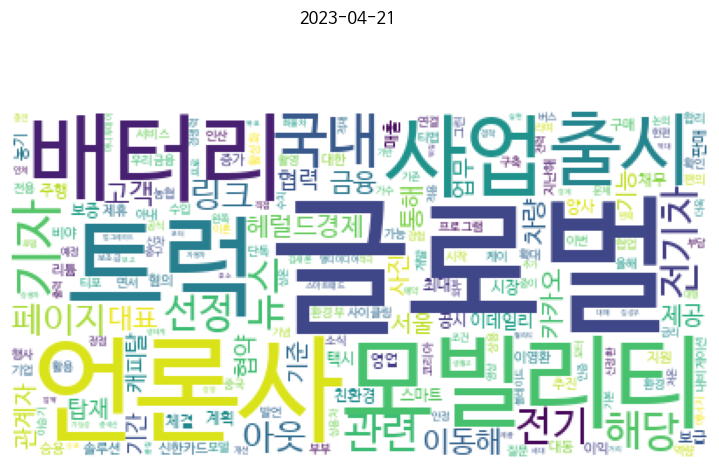

In [ ]:
article = date_list['기사본문'][0]  

tokens = okt.nouns(article)
over_one_tokens=[]
for t in tokens:        
    if len(t)>1:
        over_one_tokens.append(t)
counted_tokens = Counter(over_one_tokens)
top_20 = counted_tokens.most_common(20)
date_l = date_list.index  
char_clowd(counted_tokens,'2023-04-21')

감사합니다~~끝
